# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План анализа:
1.  Загрузка данных и изучение общей информации
2. Подготовка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


#### Шаг 1: Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('datasets/games.csv')
except FileNotFoundError:
    games = pd.read_csv('/datasets/games.csv')

display(games.info())

games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Всего в датасете 16714 строк. Все столбцы написаны с заглавной буквы и user_score имеет неправильный тип данных, исправим это в следующем шаге

#### Шаг 2: Подготовка данных

Замена названий столбцов на нижний регистр

In [3]:
games.columns = games.columns.str.lower()

games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразование данных в нужные типы

In [4]:
display(games.dtypes)

games.loc[games['user_score'] == 'tbd', 'user_score'] = 0
games['user_score'] = pd.to_numeric(games['user_score'])

games['user_score']

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

Изменили тип данных с Object на float64 для user_score, чтобы с оценками пользователей можно было проводить математические операции

Обработка пропусков

In [5]:
display(games.isna().sum())

print('Количество пропусков для каждого столбца до обработки')
for col in games.columns:
    ratio = (games[col].isna().sum() / games[col].shape[0]) * 100
    print(f'{col}: {ratio}%')

# Доля пропусков в name, genre, year_of_release меньше двух процентов -> удалим строки с пропущенными значениями
games = games.dropna(subset=['name', 'genre', 'year_of_release'])

# Для critic_score, user_score, rating достаточно большое количество пропусков. Заменим значения на ноль, так как невозможно найти оптимальную замену для этих трёх столбцов
# Можно заменить все оставшиеся значения, так как пропуски остались только в этих трёх столбцах
games = games.fillna(0)

print()
print('Количество пропусков для каждого столбца после обработки')
for col in games.columns:
    ratio = (games[col].isna().sum() / games[col].shape[0]) * 100
    print(f'{col}: {ratio}%')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Количество пропусков для каждого столбца до обработки
name: 0.011965300628178284%
platform: 0.0%
year_of_release: 1.609332934489979%
genre: 0.011965300628178284%
na_sales: 0.0%
eu_sales: 0.0%
jp_sales: 0.0%
other_sales: 0.0%
critic_score: 51.31917439425665%
user_score: 40.08973975471134%
rating: 40.478612025127134%

Количество пропусков для каждого столбца после обработки
name: 0.0%
platform: 0.0%
year_of_release: 0.0%
genre: 0.0%
na_sales: 0.0%
eu_sales: 0.0%
jp_sales: 0.0%
other_sales: 0.0%
critic_score: 0.0%
user_score: 0.0%
rating: 0.0%


Пропуски в name, genre, year_of_release могли возникнуть из-за технической или человеческой ошибки. Эти пропуски случайны

Пропуски в critic_score и user_score могли возникнуть из-за того, что у игры недостаточно оценок, чтобы отобразить общую оценку игры. Так как мы заменили все tbd (to be decided) на нулевые значения, они тоже засчитаны как пропуски. Такие пропуски, не случайны, а были специально сделаны для объективности оценки

Пропуски в rating могли возникнуть также из-за технической или человеческой ошибки, но также возможно, что игра ещё не прошла сертификацию и не получила рейтинг, если эта игра новая

Добавим столбец с суммарными продажами по всем регионам (в миллионах проданных копий)

In [6]:
# games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

У самой продаваемой игры 82 миллиона проданных копий, но это исключение. Достаточно много игр имеют примерно 5 миллионов проданных копий. Но больше всего игр имеют менее 4 миллионов проданных копий

#### Шаг 3: Исследовательский анализ данных

Сколько игр выпускалось в разные годы

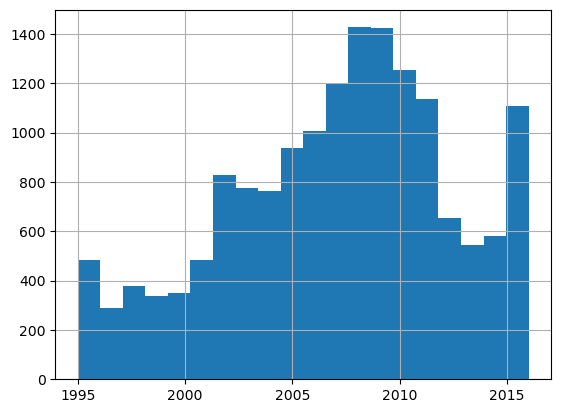

In [7]:
last_year = games['year_of_release'].max()
games['year_of_release'].hist(bins=20, range=(1995, last_year));

# До 1995 года было выпущено мало игр. Исключим все игры вышедшие до 1995 года
games = games[games['year_of_release'] >= 1995]

Пик выпуска игр был с 2007 по 2010 год. С 1995 года по 2010 был постоянный рост по количеству выпущенных игр

Как менялись продажи по платформам?

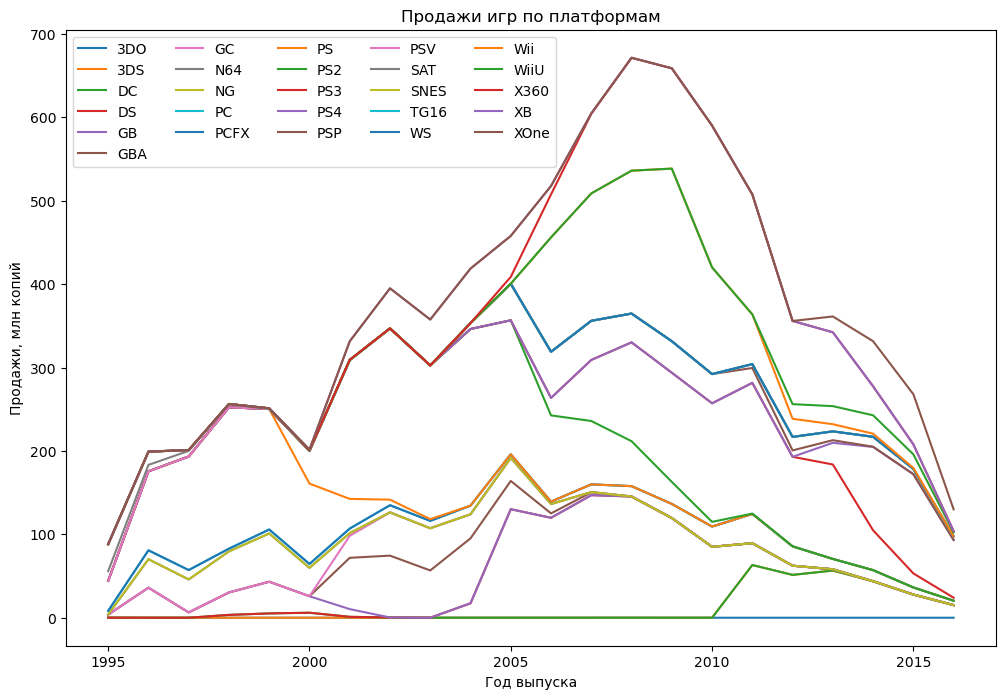

In [8]:
games_by_year_and_platform = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

games_by_year_and_platform.plot(stacked=True, figsize=(12, 8));
plt.legend(loc='upper left', ncol=5)
plt.title('Продажи игр по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн копий')
plt.show()

На графике видно, что после 2000 года какие-то платформы стали только популярнее, а какие-то стали терять популярность.

Примерно в 2008 году начался резкий спад выпуска игр на всех платформах

Распределение платформ с самыми большими продажами по годам

In [9]:
# Выберем топ 5 платформ по продажам
top5_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
top5_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

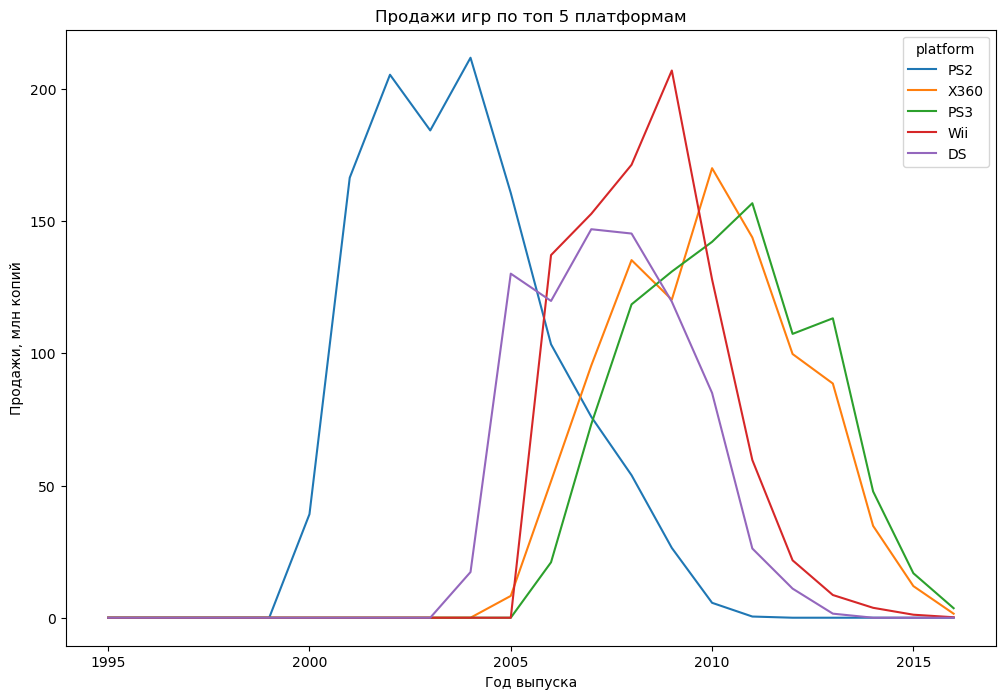

In [10]:
# Распределение по годам для топ 5 платформ
games_by_year_and_platform[top5_platforms.index].plot(figsize=(12, 8));

plt.title('Продажи игр по топ 5 платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн копий')
plt.show()

На графике видно, что платформы живут около 10 лет. Пик продаж приходится на 3-4 год после выпуска платформы. После пика продажи начинают падать.

Для прогноза на 2017 год можно взять данные за последние 2-3 года

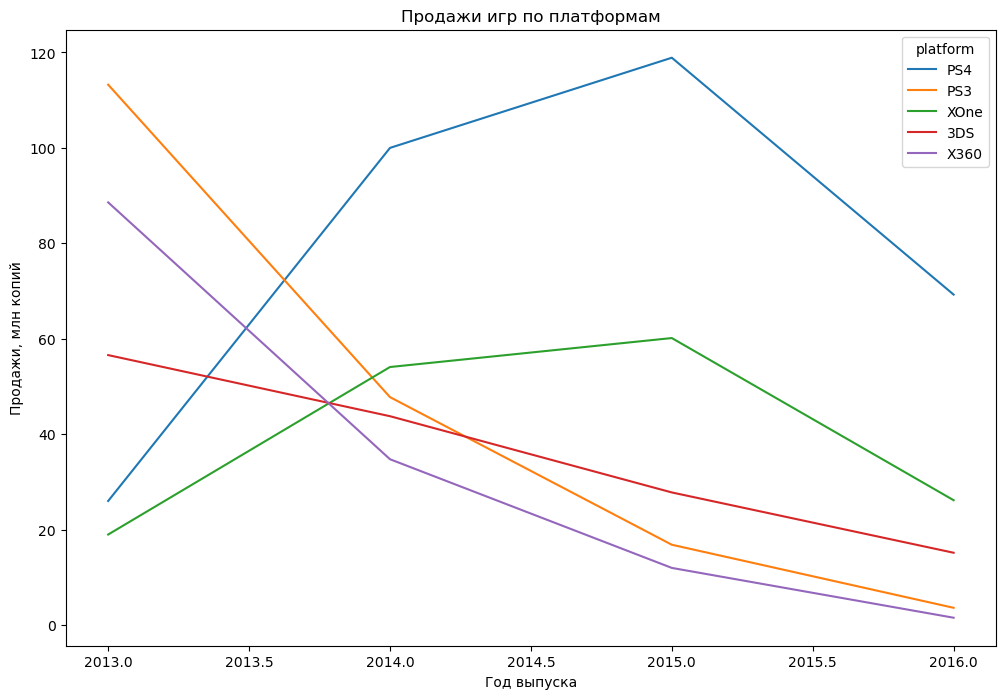

In [11]:
games = games[games['year_of_release'] >= games['year_of_release'].max() - 3]

# Посмотрим на топ 5 платформ по продажам за последние 3 года
games_by_year_and_platform = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)
top5_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

games_by_year_and_platform[top5_platforms.index].plot(figsize=(12, 8));
plt.title('Продажи игр по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи, млн копий')
plt.show()

На графике видно, что все платформы сейчас находятся на спаде. Но платформы PS4 и XOne популярнее остальных.

Для прогноза на 2017 год можно предположить, что падение продаж будет продолжаться, а платформы PS4 и XOne будут популярнее остальных

Построим график «ящик с усами» по глобальным продажам игр в разбивке по топ 5 платформам

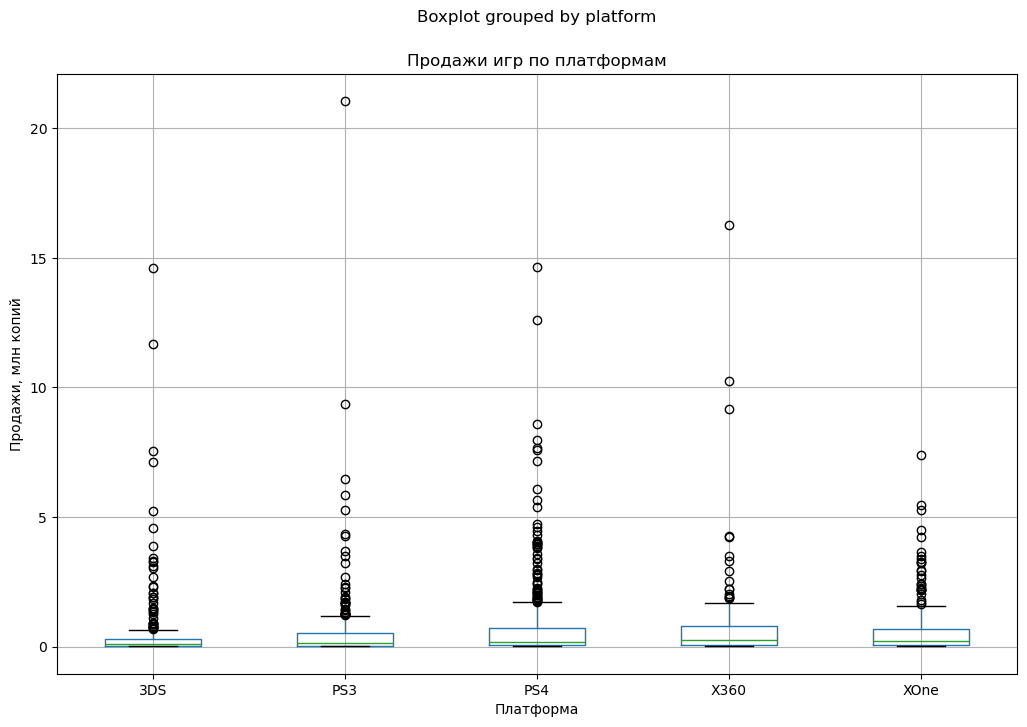

In [12]:
top5_platforms_games = games.query('platform in @top5_platforms.index')
top5_platforms_games.boxplot('total_sales', by='platform', figsize=(12, 8));

plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.show()

У каждой платформы достаточно большое количество выбросов. Больше всего продаж у PS3, X360, PS4, 3DS. Меньше всего у PS2, PSP, PSV, DS. Возможно, это связано с тем, что вышло новое поколение платформ и игры на старые платформы стали менее популярными

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Возьмем платформу PS4, так как она самая популярная среди новых платформ

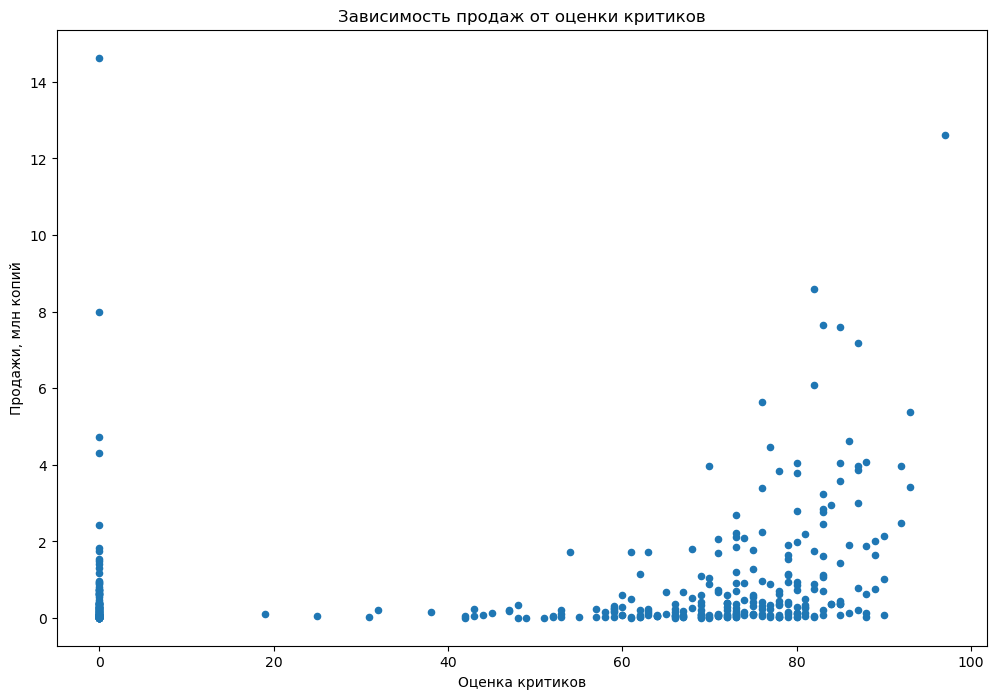

In [13]:
ps4_games = games[games['platform'] == 'PS4']

ps4_games.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12, 8));
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн копий')
plt.show()

На графике видно, что у игр с большими продажами как правило высокая оценка критиков. Также есть достаточно много игр, где высокая оценка критиков, но относительно маленькое количество продаж

Посчитаем корреляцию между отзывами и продажами

,critic_score,total_sales
critic_score,1.00000,0.22755
total_sales,0.22755,1.00000


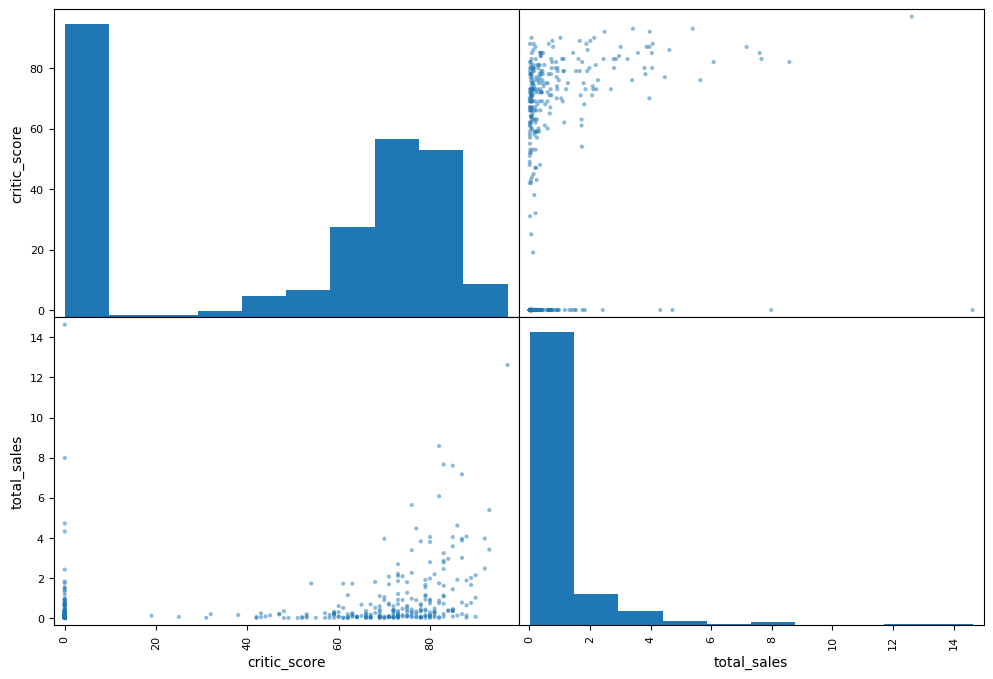

In [14]:
corr_columns = ['critic_score', 'total_sales']
ps4_corr = ps4_games[corr_columns].corr()
display(ps4_corr)

pd.plotting.scatter_matrix(ps4_games[corr_columns], figsize=(12, 8));

Корреляция между оценкой критиков и продажами - 0.35. Это положительная корреляция, но не сильная. Нельзя точно сказать, что высокая оценка критиков гарантирует большие продажи

Также посмотрим на корреляцию между оценкой критиков и продажами для других платформ

In [15]:
platforms = games['platform'].unique()

for platform in platforms:
    platform_games = games[games['platform'] == platform]
    corr = platform_games[corr_columns].corr()
    print(f'Корреляция для платформы {platform}')
    print(corr['total_sales'])
    print('---')

Корреляция для платформы PS3
critic_score    0.279274
total_sales     1.000000
Name: total_sales, dtype: float64
---
Корреляция для платформы X360
critic_score    0.246573
total_sales     1.000000
Name: total_sales, dtype: float64
---
Корреляция для платформы PS4
critic_score    0.22755
total_sales     1.00000
Name: total_sales, dtype: float64
---
Корреляция для платформы 3DS
critic_score    0.061113
total_sales     1.000000
Name: total_sales, dtype: float64
---
Корреляция для платформы XOne
critic_score    0.274839
total_sales     1.000000
Name: total_sales, dtype: float64
---
Корреляция для платформы WiiU
critic_score    0.294148
total_sales     1.000000
Name: total_sales, dtype: float64
---
Корреляция для платформы Wii
critic_score    NaN
total_sales     1.0
Name: total_sales, dtype: float64
---
Корреляция для платформы PC
critic_score    0.1857
total_sales     1.0000
Name: total_sales, dtype: float64
---
Корреляция для платформы PSV
critic_score    0.320714
total_sales     1.000000

На платформах PS и X, корреляция между отзывами критиков и продажами игр практически одинаковая, а для Wii и DS она ниже

Построим график топ жанров по продажам

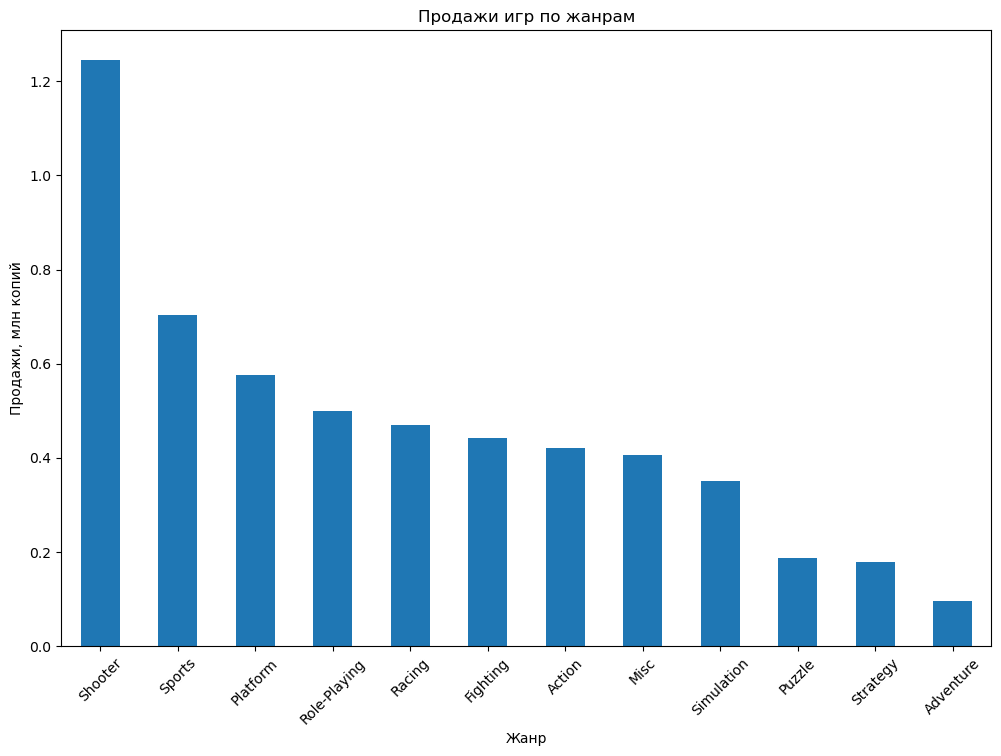

In [16]:
top_genres_by_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

top_genres_by_sales.plot(kind='bar', figsize=(12, 8));

plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation=45)
plt.show()

Определённо есть лидеры по продажам. Shooter и Sports имеют самые большие продажи. Adventure и Strategy имеют самые маленькие продажи

#### Шаг 4: Составление портрета пользователя каждого региона

Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

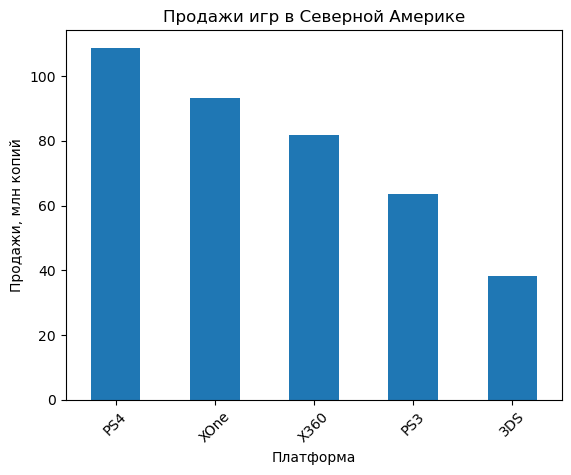

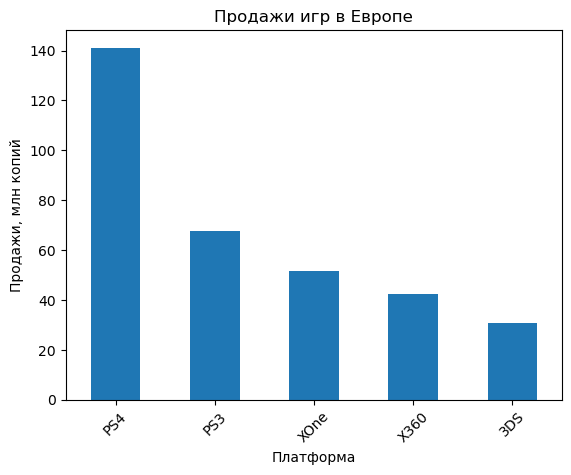

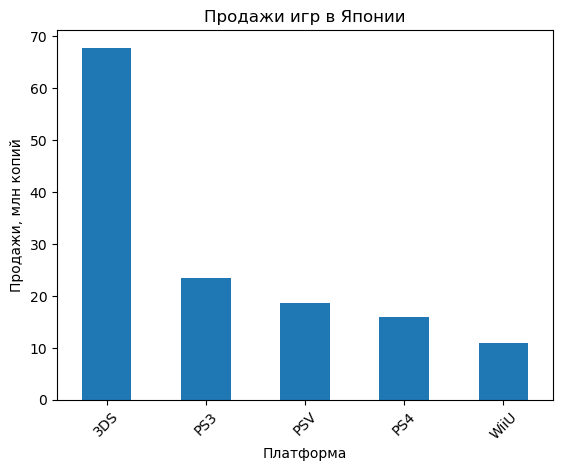

In [17]:
top5_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

top5_platforms_na.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.show()

top5_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

top5_platforms_eu.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.show()

top5_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

top5_platforms_jp.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.show()

<b>Северная Америка</b>: X360, PS3, PS4. В Северной Америке одинаково популярны X и PS <br>
<b>Европа</b>: PS3, PS4, X360. В Европе популярнее PS, чем X <br>
<b>Япония</b>: 3DS, PS3, PSP. В Японии самая популярная платформа 3DS и PS

Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

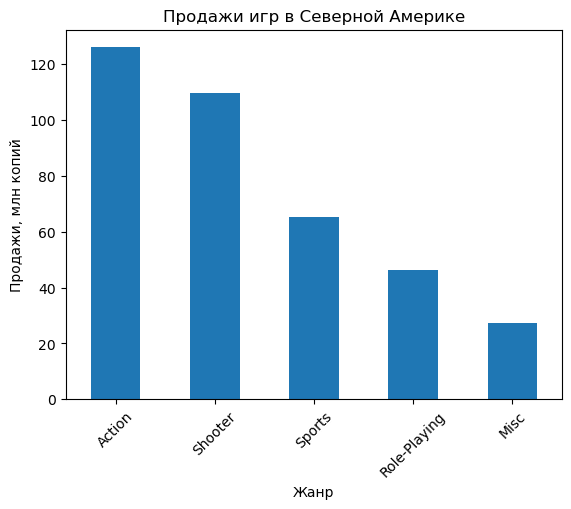

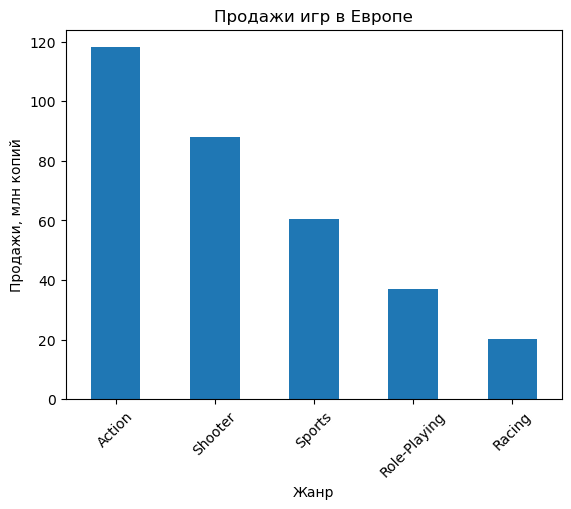

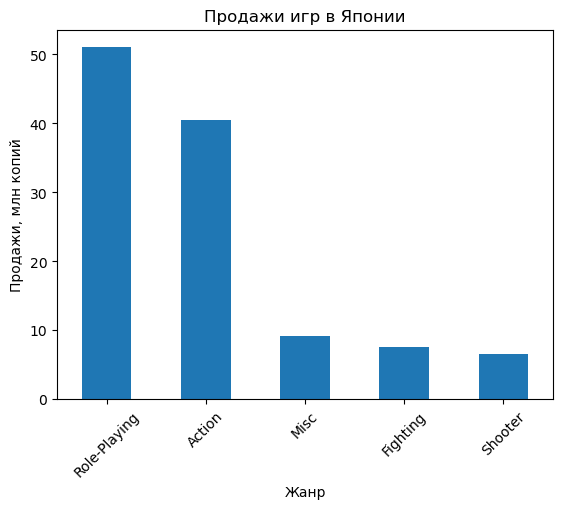

In [18]:
top5_genres_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

top5_genres_na.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.show()

top5_genres_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

top5_genres_eu.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Европе')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.show()

top5_genres_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

top5_genres_jp.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Японии')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.show()

В Северной Америке и Европе схожие предпочтения по жанрам - Action, Shooter, Sports. <br>
В Японии же предпочитают Role-Playing, Action, Misc

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

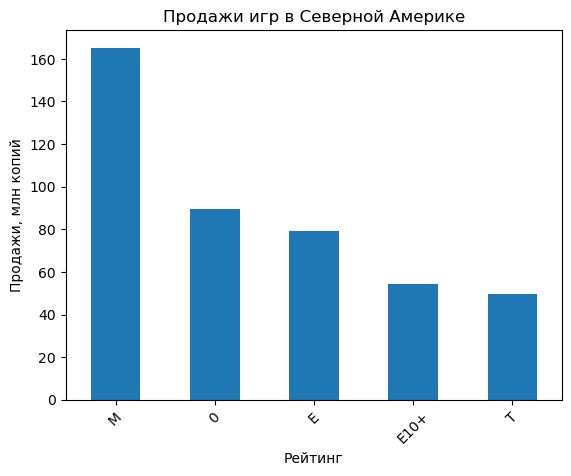

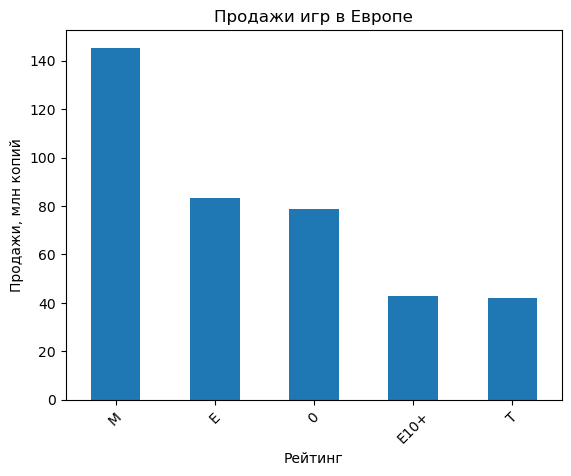

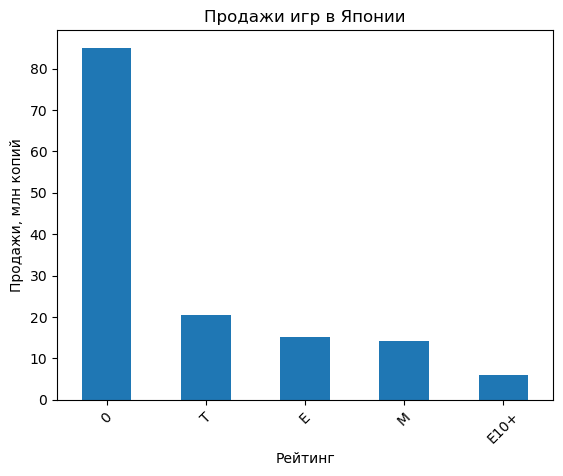

In [19]:
rating_sales_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating_sales_na.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн копий')
plt.show()

rating_sales_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating_sales_eu.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн копий')
plt.show()

rating_sales_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating_sales_jp.plot(kind='bar');
plt.xticks(rotation=45)
plt.title('Продажи игр в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн копий')
plt.show()

<b>Северная Америка</b>: самые продаваемые игры с рейтингом M и E <br>
<b>Европа</b>: самые продаваемые игры с рейтингом E и M <br>
<b>Япония</b>: самые продаваемые игры с рейтингом E

#### Шаг 5: Проверка гипотез

In [20]:
alpha = 0.05

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [21]:
xbox_one_user_ratings = games[games['platform'] == 'XOne']['user_score']
pc_user_ratings = games[games['platform'] == 'PC']['user_score']

results = st.ttest_ind(xbox_one_user_ratings, pc_user_ratings, alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

p-value: 0.24875948537089856
Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые <br>
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не одинаковые

In [22]:
action_user_ratings = games[games['genre'] == 'Action']['user_score']
sports_user_ratings = games[games['genre'] == 'Sports']['user_score']

results = st.ttest_ind(action_user_ratings, sports_user_ratings, alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые')

p-value: 0.09074207113403263
Не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые


Средние пользовательские рейтинги жанров Action и Sports разные

#### Шаг 6: Общий вывод

#### В ходе анализа данных были выполнены следующие шаги:

1. **Загружены данные и изучена общая информация**
2. **Подготовка данных**
    - Были удалены строки с полностью пропущенными значениями и явные дубликаты.
    - Недостающие значения были заменены на медианные и модальные значения.
    - Изменены типы данных для удобства анализа и подсчётов.
    - Добавлен столбец с суммарными продажами по всем регионам.
3. **Исследовательский анализ данных**
    - Построена гистограмма по количеству выпущенных игр по годам. Было выявлено, что пик выпуска игр был с 2007 по 2010 год.
    - Построен график продаж игр по платформам. Было выявлено, что платформы живут около 10 лет. Пик продаж приходится на 3-4 год после выпуска платформы. После пика продажи начинают падать.
    - Самые большие продажи игр за всё время были у PS2, X360, PS3, Wii, DS.
    - Построен график распределения по годам для топ 5 платформ. Было выявлено, что все платформы сейчас находятся на спаде.
    - Выяснили, что платформы PS4 и XOne популярнее остальных за последние 5 лет.
    - Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Было выявлено, что у каждой платформы достаточно большое количество выбросов.
    - Построен график зависимости продаж от оценки критиков для платформы PS4. Было выявлено, что у игр с большими продажами как правило высокая оценка критиков. Но нельзя точно сказать, что высокая оценка критиков гарантирует большие продажи.
    - Для других платформ ситуация аналогичная, кроме Wii и DS. Для них корреляция между отзывами критиков и продажами игр ниже остальных платформ.
    - Построен график топ жанров по продажам. Было выявлено, что Shooter и Sports имеют самые большие продажи, а Adventure и Strategy имеют самые маленькие продажи.

4. **Составление портрета пользователя каждого региона**
    - **Северная Америка:**
        - В Северной Америке одинаково популярны X и PS.
        - Самые популярные жанры: Action, Shooter, Sports.
        - Самые продаваемые игры с рейтингом M и E.
    - **Европа:**
        - В Европе популярнее PS, чем X.
        - Самые популярные жанры: Action, Shooter, Sports.
        - Самые продаваемые игры с рейтингом E и M.
    - **Япония:**
        - В Японии самая популярная платформа 3DS и PS.
        - Самые популярные жанры: Role-Playing, Action, Misc.
        - Самые продаваемые игры с рейтингом E.

5. **Проверка гипотез**
      - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
      - Средние пользовательские рейтинги жанров Action и Sports разные

#### Рекомендации:
1. Самые перспективные платформы - PS4 и XOne.
2. Самые популярные жанры - Shooter и Sports.
3. Самые продаваемые игры с рейтингом E и M.
4. Игры с высокими оценками критиков имеют больше шансов на успех, чем игры с низкими оценками.

Стоить обратить внимание на эти рекомендации для более успешных продаж игр